In [690]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
from typing import List

In [691]:
df = pd.read_csv("../data/cleaned_data.csv")
df.head()

,id,building_type,building_subtype,price,living_area,frontages,bedrooms,bathrooms,liv_room_surf,kitchen_type,...,swimming_pool,status_build,furnished,energy_class,heating,flood_zone,surroundings,zipcode,municipality,province
0,10579542,apartment,apartment,210000.0,50.0,2.0,1.0,1.0,NaN,1.0,...,0.0,3.0,NaN,4,Gas,Non flood zone,Urban,1030,Schaerbeek,Brussels Capital Region
1,10470376,house,house,NaN,130.0,3.0,3.0,1.0,28.0,1.0,...,NaN,2.0,NaN,4,Gas,NaN,NaN,4400,Mons-Lez-Liège,Liège
2,10576898,apartment,apartment,235000.0,41.0,2.0,1.0,1.0,22.0,1.0,...,NaN,2.0,1.0,4,Electric,NaN,Urban,9000,Gent,East Flanders
3,10482213,apartment,apartment,NaN,58.0,NaN,1.0,1.0,23.0,0.0,...,NaN,3.0,NaN,6,Gas,NaN,NaN,4040,Herstal,Liège
4,10585245,apartment,apartment,235000.0,90.0,2.0,2.0,1.0,20.0,0.0,...,NaN,2.0,0.0,4,Gas,NaN,"Living area (residential, urban or rural)",1020,Laeken,Brussels Capital Region


In [692]:
df.shape

(29783, 26)

In [693]:
missing_values = df.isnull().sum()
missing_values

id                      0
building_type           0
building_subtype        0
price                4587
living_area          6491
frontages            8812
bedrooms             1019
bathrooms            6292
liv_room_surf       18027
kitchen_type        12941
showers             23670
toilets              9508
basement            19282
terrace                 0
garden                  0
elevator            18818
swimming_pool       22236
status_build         8843
furnished           17721
energy_class            0
heating             10394
flood_zone          17745
surroundings        20456
zipcode                 0
municipality            0
province                0
dtype: int64

In [694]:
missing_values = df[df["bedrooms"].isnull()].groupby("building_subtype").size()
missing_values

building_subtype
apartment              80
apartment-block        74
chalet                  5
country-cottage         1
duplex                  3
farmhouse               2
flat-studio           596
ground-floor            8
house                 140
kot                    13
loft                   16
manor-house             1
mixed-use-building     54
other-property         16
penthouse               3
service-flat            6
villa                   1
dtype: int64

In [695]:
df_studio = df[df["building_subtype"] == "flat-studio"].copy()
df_studio["bedrooms"].replace({np.nan: 1, 2: 1, 5 : 1}, inplace=True)

In [696]:
df.drop(df[df["building_subtype"] == "flat-studio"].index, inplace=True)
df = pd.concat([df, df_studio])
df[df["building_subtype"] == "flat-studio"][["bedrooms"]].value_counts()
df.head()

,id,building_type,building_subtype,price,living_area,frontages,bedrooms,bathrooms,liv_room_surf,kitchen_type,...,swimming_pool,status_build,furnished,energy_class,heating,flood_zone,surroundings,zipcode,municipality,province
0,10579542,apartment,apartment,210000.0,50.0,2.0,1.0,1.0,NaN,1.0,...,0.0,3.0,NaN,4,Gas,Non flood zone,Urban,1030,Schaerbeek,Brussels Capital Region
1,10470376,house,house,NaN,130.0,3.0,3.0,1.0,28.0,1.0,...,NaN,2.0,NaN,4,Gas,NaN,NaN,4400,Mons-Lez-Liège,Liège
2,10576898,apartment,apartment,235000.0,41.0,2.0,1.0,1.0,22.0,1.0,...,NaN,2.0,1.0,4,Electric,NaN,Urban,9000,Gent,East Flanders
3,10482213,apartment,apartment,NaN,58.0,NaN,1.0,1.0,23.0,0.0,...,NaN,3.0,NaN,6,Gas,NaN,NaN,4040,Herstal,Liège
4,10585245,apartment,apartment,235000.0,90.0,2.0,2.0,1.0,20.0,0.0,...,NaN,2.0,0.0,4,Gas,NaN,"Living area (residential, urban or rural)",1020,Laeken,Brussels Capital Region


In [697]:
df = df.drop(columns = ["kitchen_type", "status_build", "liv_room_surf", "frontages", "bathrooms", "id", "basement","elevator", "surroundings","flood_zone", "heating", "showers","toilets", "furnished", "heating","flood_zone"])

#dropna living_area, price
df = df.dropna(subset=["living_area", "price", "bedrooms"])

#replace swimming_pool None with 0
df["swimming_pool"] = df["swimming_pool"].fillna(0)

In [698]:
missing_values = df.isnull().sum()
missing_values

building_type       0
building_subtype    0
price               0
living_area         0
bedrooms            0
terrace             0
garden              0
swimming_pool       0
energy_class        0
zipcode             0
municipality        0
province            0
dtype: int64

In [699]:
df.shape

(21055, 12)

In [700]:
def remove_outliers(df: pd.DataFrame, columns: List[str], n_std: int) -> pd.DataFrame:
    for col in columns:
        print('Working on column: {}'.format(col))

        mean = df[col].mean()
        sd = df[col].std()

        df = df[(df[col] <= mean+(n_std*sd))]

    return df

In [701]:
df = remove_outliers(df, ['living_area','price','bedrooms','terrace','garden'], 4)

Working on column: living_area
Working on column: price
Working on column: bedrooms
Working on column: terrace
Working on column: garden


In [702]:
df.shape

(20815, 12)

In [703]:
"""# Calcul du premier et du troisième quartile
Q1 = df['bedrooms'].quantile(0.25)
Q3 = df['bedrooms'].quantile(0.75)

# Calcul de l'écart interquartile (IQR)
IQR = Q3 - Q1

# Définition des limites inférieure et supérieure
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Suppression des valeurs aberrantes
df = df[(df['bedrooms'] >= lower_bound) & (df['bedrooms'] <= upper_bound)]"""

"# Calcul du premier et du troisième quartile\nQ1 = df['bedrooms'].quantile(0.25)\nQ3 = df['bedrooms'].quantile(0.75)\n\n# Calcul de l'écart interquartile (IQR)\nIQR = Q3 - Q1\n\n# Définition des limites inférieure et supérieure\nlower_bound = Q1 - 1.5 * IQR\nupper_bound = Q3 + 1.5 * IQR\n\n# Suppression des valeurs aberrantes\ndf = df[(df['bedrooms'] >= lower_bound) & (df['bedrooms'] <= upper_bound)]"

In [704]:
missing_values = df.isnull().sum()
missing_values

building_type       0
building_subtype    0
price               0
living_area         0
bedrooms            0
terrace             0
garden              0
swimming_pool       0
energy_class        0
zipcode             0
municipality        0
province            0
dtype: int64

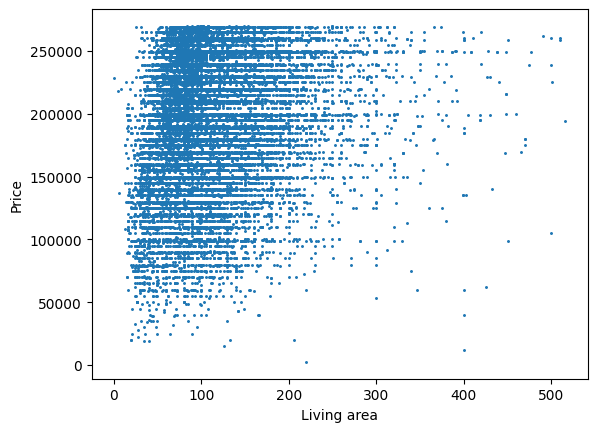

In [705]:
import matplotlib.pyplot as plt

x = np.array(df["living_area"])
y = np.array(df["price"])


plt.scatter(x=x, y=y, marker=".", s=5)
plt.xlabel("Living area")
plt.ylabel("Price")
plt.show()

In [689]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np

x = np.array(df[["living_area", "bedrooms", "terrace", "garden", "swimming_pool", "energy_class"]])
y = np.array(df["price"])


X_train = np.array(x).reshape(-1, 6)
y_train = np.array(y).reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.30, random_state=1)
regressor = LinearRegression().fit(X_train, y_train)
score = regressor.score(X_train, y_train)
print("Model Score:", score)

y_pred = regressor.predict(X_test)

df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_preds)


Model Score: 0.07047239245010861
        Actual      Predicted
0     179000.0  194877.005732
1      59999.0  175942.453906
2     125000.0  200206.714045
3     199000.0  178550.240651
4     249000.0  219302.741673
...        ...            ...
6240  245000.0  209159.757741
6241  129900.0  187308.557055
6242  119000.0  193454.797525
6243  249000.0  219228.108436
6244  155000.0  199423.318305

[6245 rows x 2 columns]


In [ ]:
plt.scatter(X_train, y_train, marker=".", s=5)
plt.plot(X_train, regressor.predict(X_train), color="r")
plt.title("Train")
plt.xlabel("Living area")
plt.ylabel("Price")
plt.show()